<a href="https://colab.research.google.com/github/niyati10000/Image-Processing-Portfolio/blob/main/3_Frequency_Domain_Analysis/module_3Frequency_Domain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

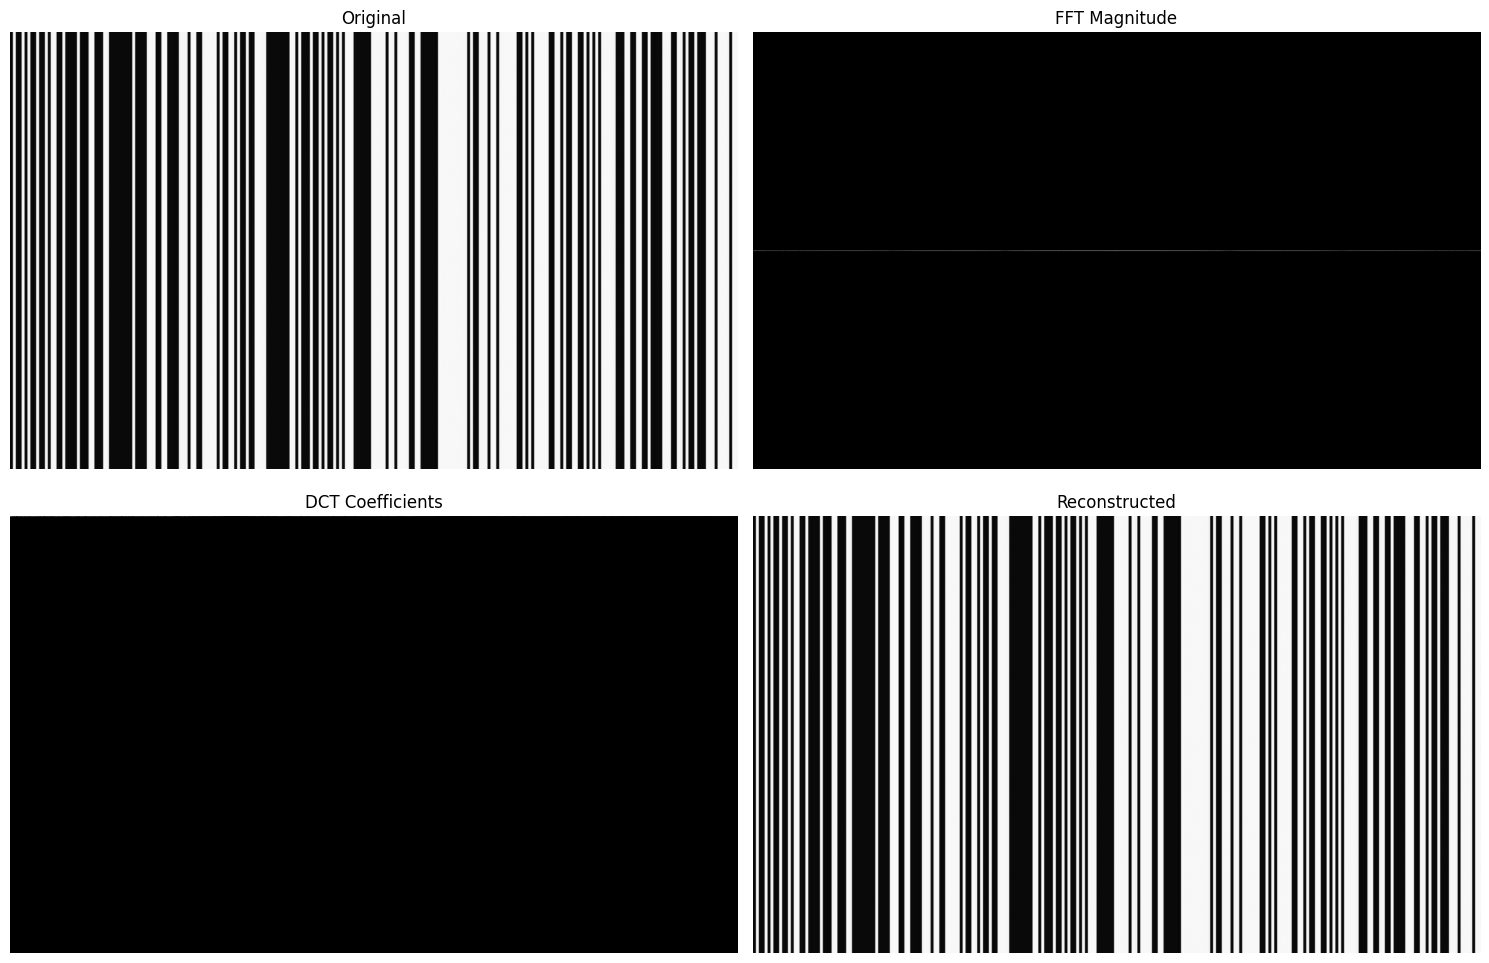

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('mod3.jpg', 0)
gray = img.astype(np.float32) / 255.0
[m, n] = gray.shape

f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(1 + np.abs(fshift))

def get_dct_matrix(size):
    T = np.zeros((size, size))
    for p in range(size):
        for q in range(size):
            if p == 0:
                T[p, q] = 1/np.sqrt(size)
            else:
                T[p, q] = np.sqrt(2/size) * np.cos(np.pi * (2*q + 1) * p / (2*size))
    return T

T_row = get_dct_matrix(m)
T_col = get_dct_matrix(n)

dct_coeffs = np.dot(np.dot(T_row, gray), T_col.T)
reconstructed = np.dot(np.dot(T_row.T, dct_coeffs), T_col)

plt.figure(figsize=(15, 10))
images = [gray, magnitude_spectrum, np.log(1 + np.abs(dct_coeffs)), reconstructed]
titles = ['Original', 'FFT Magnitude', 'DCT Coefficients', 'Reconstructed']

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

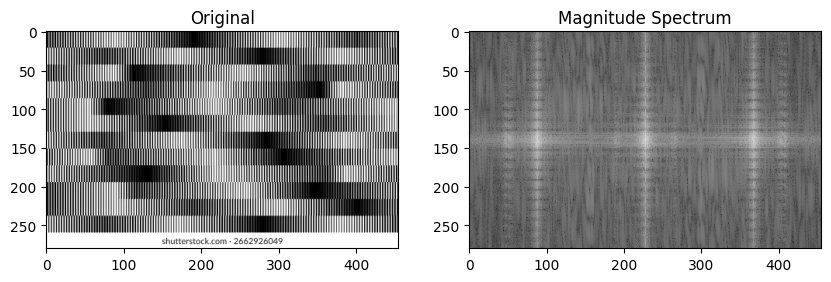

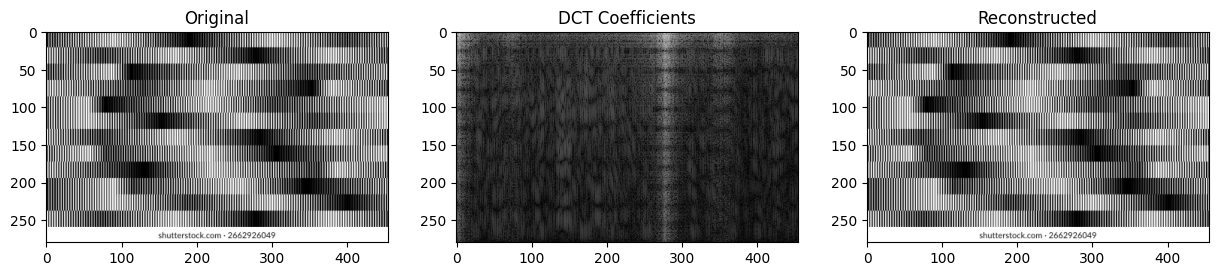

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import dct, idct

img = cv2.imread('img3.webp', 0)

if img is None:
    print("Error: Could not find 'img3.webp'. Please upload it to Colab.")
else:
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(1 + np.abs(dft_shift))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(1, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray'), plt.title('Magnitude Spectrum')
    plt.show()

    def dct2(a):
        return dct(dct(a.T, norm='ortho').T, norm='ortho')

    def idct2(a):
        return idct(idct(a.T, norm='ortho').T, norm='ortho')

    img_dct = dct2(img)
    img_reconstructed = idct2(img_dct)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(1, 3, 2), plt.imshow(np.log(1 + np.abs(img_dct)), cmap='gray'), plt.title('DCT Coefficients')
    plt.subplot(1, 3, 3), plt.imshow(img_reconstructed, cmap='gray'), plt.title('Reconstructed')
    plt.show()